nr of spikes: 0


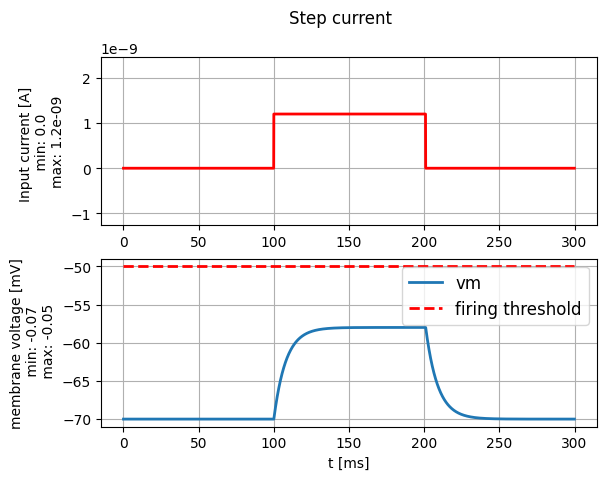

nr of spikes: 5


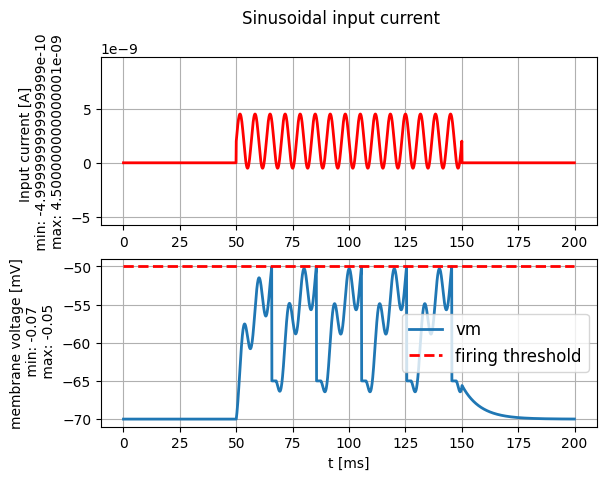

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

nr of spikes: 0


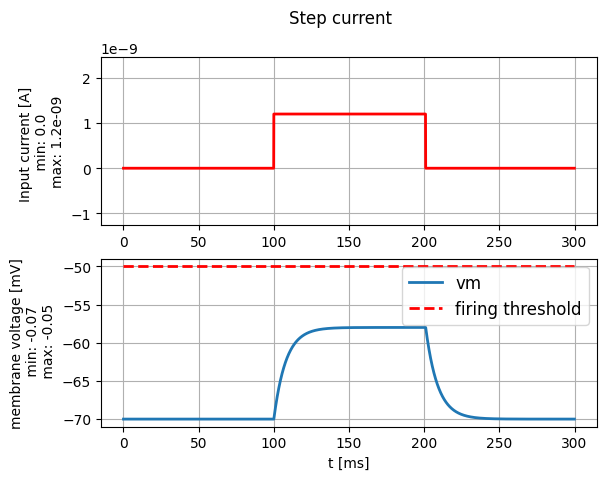

nr of spikes: 5


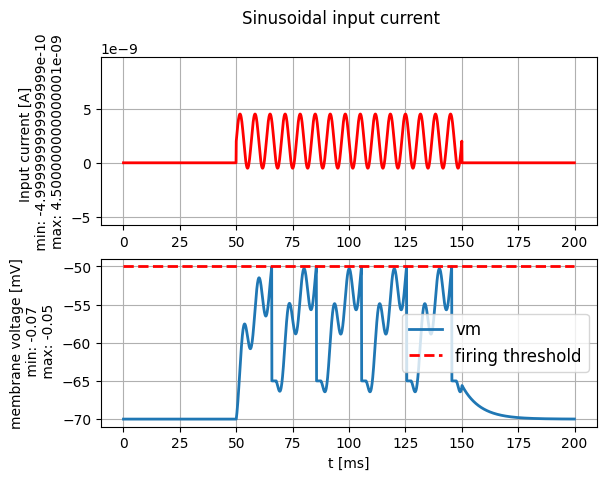

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
LIF.getting_started()
LIF.print_default_parameters()

resting potential: -0.07
nr of spikes: 18


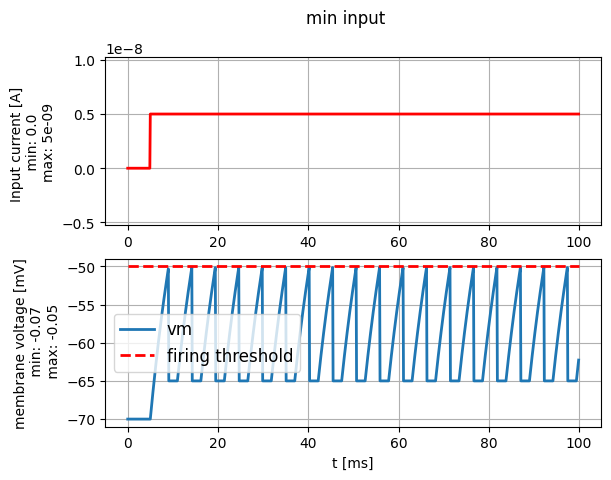

In [6]:
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))


import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

I_min=5*10**-9*b2.amp #Calculate rheobase via Ohm's Law V=IR, get the R from the parameters and V is the threshold
#from the parameters as well. Then you can just calculate the voltage by rearranging the terms! Great success!

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0